## Logistic regression from scratch

Logistic regression, despite its name, is more often applied to the classification problems. It is used to estimate the probability of binary varibles. Mathematically, it is constructed by a linear regression and a logistic fuction (sigmoid function).

Here I implement two case:
- binary classification
- multinomial logistic regression with multiple classes. 

Logistic regression is a very import model which is served as the building block of neural network and various deep learning architectures.

In [1]:
from __future__ import print_function, division
import numpy as np
import math

class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

class Softmax():
    def __call__(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

    def gradient(self, x):
        p = self.__call__(x)
        return p * (1 - p)

class LogisticRegression():
    def __init__(self, learning_rate=.1, n_iterations=1000):
        self.w = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.sigmoid = Sigmoid()

    def _initialize_parameters(self, n_features):
        limit = 1 / math.sqrt(n_features)
        self.w = np.random.uniform(-limit, limit, (n_features,))

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        n_features = np.shape(X)[1]
        self._initialize_parameters(n_features)
        for i in range(self.n_iterations):
            y_bar = self.sigmoid(X.dot(self.w))
            grad_w = -X.T.dot(y-y_bar)
            self.w -= self.learning_rate * grad_w
            
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = np.round(self.sigmoid(X.dot(self.w))).astype(int)
        return y_pred

In [2]:
X = np.array([[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7]]).T
y = np.array([0, 0, 0, 1, 1, 1])
X_t=np.array([[7,8], [0,1]])

lrc = LogisticRegression()
lrc.fit(X, y)
lrc.predict(X_t)

array([1, 0])

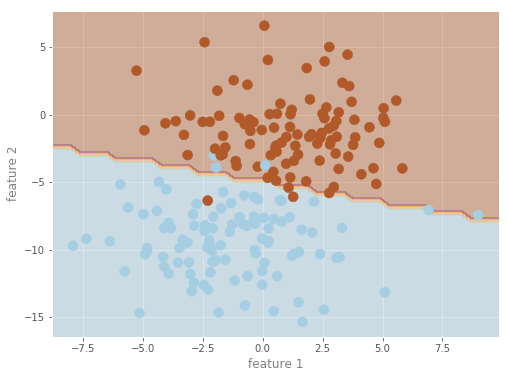

In [3]:
from tools.plot import plot_class
lrc = LogisticRegression(learning_rate=1e-3, n_iterations=1000)
plot_class(lrc)